# 1. Importe librerias

Importamos las librerias necesarias para analizar, limpiar y utilizar nuestros datos en función de los modelos que vamos a utlizar en este proyecto. 

In [51]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

# 2. Obtenga los datos

Leemos los csv que nos dieron para entrenamiento y testeo.

In [52]:
#cargar el archivo 
entrenamiento = pd.read_csv(r'properties_colombia\properties_colombia_train.csv')
entrenamiento

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431)


Se realiza una copia al Dataframe.

In [53]:
train = entrenamiento.copy() # Realizamos una copia al Dataframe importado originalme

Creamos una columna llamada target y otra con el promedio de precios.

In [54]:
train = train.assign(promedio = train['price'].mean())
train = train.assign(target = 0)
train.head(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,price,currency,price_period,title,description,property_type,operation_type,geometry,promedio,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),6.436051e+08,0
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),6.436051e+08,0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),6.436051e+08,0


Dentro de la columna target ponemos valores entre 0 y 1.

In [55]:
train['target'] = train.apply(lambda x: 1 if x['price'] > x['promedio'] else 0, axis=1)
train.head(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,price,currency,price_period,title,description,property_type,operation_type,geometry,promedio,target
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),6.436051e+08,1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),6.436051e+08,0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),6.436051e+08,0


Eliminamos las columnas de price y promedio ya que serán irrelevantes.

In [56]:
train.drop(columns=["price"],inplace=True)
train.drop(columns=["promedio"],inplace=True)

# Creamos una copia del dataset para evitar dañar el trabajo hecho.

In [57]:
retrain = train.copy()

Eliminamos columnas que vemos no aportan información.

In [58]:
descartadas = ['surface_covered','surface_total', 'rooms', 'price_period','bedrooms','l4', 'l5', 'l6', 'ad_type','operation_type','created_on','id']
retrain = train.drop(columns=descartadas)
retrain.head(3)

,Unnamed: 0,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,geometry,target
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0


Cambiamos el nombre de la columna Unnamed: 0 por Id_Propiedad ya que contiene valores unicos.

In [59]:
retrain = retrain.rename(columns={"Unnamed: 0":"Id_Propiedad"})
retrain.head(3)

,Id_Propiedad,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,geometry,target
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0


Se cambia el tipo de dato de property_type de "object" a "category" para poder realizar la recategorización.

In [60]:
retrain["property_type"] = retrain["property_type"].astype("category")

Eliminamos filas con valores nulos para empezar nuestro modelo.

In [61]:
retrain.dropna(inplace=True)
retrain

,Id_Propiedad,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,title,description,property_type,geometry,target
0,861131,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,POINT (-75.572 6.203),1
1,200972,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,POINT (-74.0731146 4.7227485),0
2,554622,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,POINT (-74.03 4.709),0
5,991390,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,"Venta apartamento en Via Panamericana, Manizal...",Nos complace ofrecer este excelente proyecto u...,Apartamento,POINT (-75.50680161 5.04900894),0
6,51545,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,Espectacular Casa en cerros de provenza.,"Casa de tres pisos,en el ultimo piso,terraza b...",Casa,POINT (-74.0821496 4.732379),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197543,418228,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,APARTAMENTO EN VENTA EN URBANIZACION CASTILLA ...,638-2036 Venta Espectacular Apartamento ubicad...,Apartamento,POINT (-74.1474797 4.6360473),0
197545,976934,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,COP,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,POINT (-74.055 4.668),0
197546,508286,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,COP,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,POINT (-76.541 3.413),0
197547,546633,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,POINT (-74.14707691 4.67487431),0


# Modelo

Los modelos de ML necesitan datos numéricos y para poder recategorizarlos de manera correcta, se utiliza "OneHotEncoder" de la libreria de Sklearn.

In [62]:
from sklearn.preprocessing import OneHotEncoder 
codificador=OneHotEncoder()
codificacion=codificador.fit_transform(train[["property_type"]])
tipo_prop=pd.DataFrame(codificacion.toarray(),columns=["apartamento","casa","finca","local_comercial","lote","oficina","parqueadero","otro"])
retrain=pd.concat([retrain,tipo_prop], axis="columns")
retrain

,Id_Propiedad,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,parqueadero,otro
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
197541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Borramos valores nulos.

In [63]:
retrain.dropna(inplace=True)
retrain

,Id_Propiedad,start_date,end_date,lat,lon,l1,l2,l3,bathrooms,currency,...,geometry,target,apartamento,casa,finca,local_comercial,lote,oficina,parqueadero,otro
0,861131.0,2020-12-14,9999-12-31,6.203000,-75.572000,Colombia,Antioquia,Medellín,4.0,COP,...,POINT (-75.572 6.203),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972.0,2020-09-16,2021-05-14,4.722748,-74.073115,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.0731146 4.7227485),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622.0,2020-08-19,2020-08-20,4.709000,-74.030000,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.03 4.709),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,991390.0,2020-12-17,2021-03-04,5.049009,-75.506802,Colombia,Caldas,Manizales,2.0,COP,...,POINT (-75.50680161 5.04900894),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,51545.0,2020-09-13,2020-09-24,4.732379,-74.082150,Colombia,Cundinamarca,Bogotá D.C,8.0,COP,...,POINT (-74.0821496 4.732379),1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197543,418228.0,2020-08-11,2020-08-11,4.636047,-74.147480,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.1474797 4.6360473),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197545,976934.0,2020-11-27,2020-12-09,4.668000,-74.055000,Colombia,Cundinamarca,Bogotá D.C,1.0,COP,...,POINT (-74.055 4.668),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197546,508286.0,2020-10-28,2021-01-02,3.413000,-76.541000,Colombia,Valle del Cauca,Cali,1.0,COP,...,POINT (-76.541 3.413),0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197547,546633.0,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,Bogotá D.C,2.0,COP,...,POINT (-74.14707691 4.67487431),0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Realizamos un subset para el modelo

In [64]:
retrainmodel=subset=retrain[["parqueadero","l2","l3","apartamento","target","finca","casa","lote",
                            "local_comercial","oficina","otro","bathrooms"]]

Vemos el modelo.

In [65]:
retrainmodel

,parqueadero,l2,l3,apartamento,target,finca,casa,lote,local_comercial,oficina,otro,bathrooms
0,0.0,Antioquia,Medellín,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
1,0.0,Cundinamarca,Bogotá D.C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,Cundinamarca,Bogotá D.C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
5,0.0,Caldas,Manizales,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6,0.0,Cundinamarca,Bogotá D.C,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
197543,0.0,Cundinamarca,Bogotá D.C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
197545,0.0,Cundinamarca,Bogotá D.C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
197546,1.0,Valle del Cauca,Cali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197547,0.0,Cundinamarca,Bogotá D.C,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


Utilizamos pairplot para el modelo a entrenar.

In [66]:
# sns.pairplot(retrainmodel,hue="target")

Separamos los datos de entrenamiento y testeo para entrenar el modelo utilizando las varibales elegidas.

In [67]:
from sklearn.model_selection import train_test_split

datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    retrain[[ "parqueadero","apartamento","finca","casa","lote","local_comercial","oficina","otro","bathrooms"]],
    retrain["target"], 
    test_size=0.30) 

Entrenamiento y muestra del modelo de arboles de decisión según su "entropía" y con una profundidad de 3.

El accuracy del modelo es:  0.8461774262767457
|--- bathrooms <= 3.50
|   |--- bathrooms <= 2.50
|   |   |--- parqueadero <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- parqueadero >  0.50
|   |   |   |--- class: 0.0
|   |--- bathrooms >  2.50
|   |   |--- parqueadero <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- parqueadero >  0.50
|   |   |   |--- class: 1.0
|--- bathrooms >  3.50
|   |--- bathrooms <= 4.50
|   |   |--- casa <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- casa >  0.50
|   |   |   |--- class: 0.0
|   |--- bathrooms >  4.50
|   |   |--- casa <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- casa >  0.50
|   |   |   |--- class: 1.0



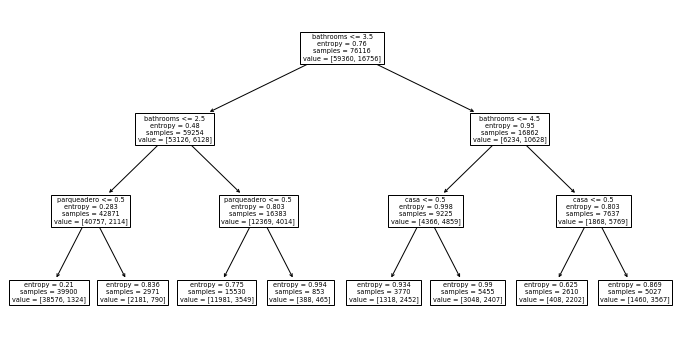

In [68]:
from sklearn import tree


arbol_decision = tree.DecisionTreeClassifier(criterion="entropy",max_depth=3)

arbol = arbol_decision.fit(datos_entrena, clase_entrena)

accuracy = arbol_decision.score(datos_prueba, clase_prueba)


print("El accuracy del modelo es: ", accuracy)


print(tree.export_text(arbol,
                      feature_names=[ "parqueadero","apartamento","finca","casa","lote","local_comercial","oficina","otro","bathrooms"]))
plt.figure(figsize=(12, 6))
tree.plot_tree(arbol, 
              feature_names=[ "parqueadero","apartamento","finca","casa","lote","local_comercial","oficina","otro","bathrooms"])
plt.show()

Se importa el archivo para testear los datos.

In [69]:
test=pd.read_csv(r'properties_colombia\properties_colombia_train.csv')
test

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1.310000e+09,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,2.100000e+08,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,NaN,NaN,1.290000e+08,COP,NaN,LM: VENDO APARTAMENTO EN TORRES DE TINTALA,"VENDO LINDO APARTAMENTO EN EL TINTAL, SEXTO PI...",Apartamento,Venta,POINT (-74.1619504 4.649682)
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,NaN,17.0,1.350000e+08,COP,NaN,Oficina En Venta En Bogota El Retiro Cod. VREI...,"OFICINA EN VENTA, MUY BIEN UBICADA CERCA A EL ...",Oficina,Venta,POINT (-74.055 4.668)
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,NaN,NaN,5.200000e+08,COP,NaN,Local En Venta En Cali Nueva Tequendama CodVBS...,Excelente local Ubicado en el segundo piso del...,Otro,Venta,POINT (-76.541 3.413)
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,NaN,NaN,2.900000e+08,COP,Mensual,VENTA CASALOTE FONTIBON,CASALOTE BIEN UBICADO FONTIBON OPSION DE CONST...,Casa,Venta,POINT (-74.14707691 4.67487431)


Eliminamos los nulos del dataset.

In [70]:
test.dropna()
test.head(3)

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,NaN,NaN,9.000000e+09,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,NaN,NaN,6.250000e+08,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,NaN,NaN,4.200000e+08,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)


Se utilizan los mismos criterios (features) del set de entrenamiento, para poder evaluar uniformemente.

In [71]:
codificadortest=OneHotEncoder()
codificaciontest=codificadortest.fit_transform(test[["property_type"]])
tipo_prop=pd.DataFrame(codificaciontest.toarray(),columns=["apartamento","casa","finca","local_comercial","lote","oficina","parqueadero","otro"])
test=pd.concat([test,tipo_prop], axis="columns")
test

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,operation_type,geometry,apartamento,casa,finca,local_comercial,lote,oficina,parqueadero,otro
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.203000,-75.572000,Colombia,Antioquia,...,Venta,POINT (-75.572 6.203),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.722748,-74.073115,Colombia,Cundinamarca,...,Venta,POINT (-74.0731146 4.7227485),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.709000,-74.030000,Colombia,Cundinamarca,...,Venta,POINT (-74.03 4.709),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,Venta,POINT EMPTY,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,Venta,POINT EMPTY,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,444298,u2M1W+AwbEZlRdmphDOuZg==,Propiedad,2020-10-27,9999-12-31,2020-10-27,4.649682,-74.161950,Colombia,Cundinamarca,...,Venta,POINT (-74.1619504 4.649682),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197545,976934,m0P17AlA6Sp+uvJTI3x3AA==,Propiedad,2020-11-27,2020-12-09,2020-11-27,4.668000,-74.055000,Colombia,Cundinamarca,...,Venta,POINT (-74.055 4.668),0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
197546,508286,nSRnmPZIwE92m/FQv8ktVQ==,Propiedad,2020-10-28,2021-01-02,2020-10-28,3.413000,-76.541000,Colombia,Valle del Cauca,...,Venta,POINT (-76.541 3.413),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197547,546633,cbYIZxxFHsXvvkixg5+DBQ==,Propiedad,2020-08-14,2020-08-14,2020-08-14,4.674874,-74.147077,Colombia,Cundinamarca,...,Venta,POINT (-74.14707691 4.67487431),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
retrainmodel=subset=retrain[["parqueadero","l2","l3","apartamento","target","finca","casa","lote",
                            "local_comercial","oficina","otro","bathrooms"]]

Se separan los features como modelo.

In [73]:
testmodel=subset=test[["parqueadero","apartamento","finca","casa","lote","local_comercial","oficina","otro","bathrooms"]]

Se observa que el feature "bathrooms" contiene nulos y por ende no se le podrá aplicar el modelo.

In [74]:
testmodel.bathrooms

0         4.0
1         2.0
2         2.0
3         1.0
4         2.0
         ... 
197544    NaN
197545    1.0
197546    1.0
197547    2.0
197548    1.0
Name: bathrooms, Length: 197549, dtype: float64

Se calcula la media de la columna "bathrooms" para poder reemplazar los valores nulos.

In [75]:
promedio=testmodel["bathrooms"].mean()

Se reemplazan los valores nulos por su promedio.

In [76]:
testmodel.fillna(promedio,inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_15392\1044090712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testmodel.fillna(promedio,inplace=True)


Predicción con el modelo.

In [77]:
prediccion=arbol_decision.predict(testmodel)

Creación del DataFrame para preparar el archivo a exportar.

In [78]:
pred=pd.DataFrame(prediccion,columns=["pred"])
pred

,pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
197544,0.0
197545,0.0
197546,0.0
197547,0.0


Contamos la cantidad de valores en cada una de las alternativas de predicción.

In [79]:
pred.value_counts()

pred
0.0     170162
1.0      27387
dtype: int64

Esto indica que del total de 197.549  valores predichos, el modelo predice que 170.162 propiedades son consideradas "baratas" y 27.387 propiedades se estiman "caras".

In [81]:
pred.to_csv("FabianRueda28.csv",index=False)